In [2]:
import torch
import torch.nn as nn
import numpy as np



import numpy as np
import copy
import matplotlib.pyplot as plt


class boxFilters(nn.Module):
    def __init__(self,a,b,c,d):
        super(boxFilters, self).__init__()
        self.alpha = nn.Parameter(torch.tensor(1.0),requires_grad=True)
        #self.a = nn.Parameter(torch.tensor(a))
        #self.b = nn.Parameter(torch.tensor(b))
        #self.c = nn.Parameter(torch.tensor(c))
        #self.d = nn.Parameter(torch.tensor(d))
        self.a = int(a)
        self.b = int(b)
        self.c = int(c)
        self.d = int(d)
        # self.a.requires_grad = False
        # self.b.requires_grad = False
        # self.c.requires_grad = False
        # self.d.requires_grad = False


    
    def setAlpha(self,alpha):
        self.alpha = nn.Parameter(torch.tensor(alpha),requires_grad=True)
    
    def setABCD(self,a,b,c,d):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
    
    def printParams(self):
        print("A:",self.a,"B:",self.b,"C:",self.c,"D:",self.d, "Alpha:", self.alpha)








In [ ]:
    # def forward(self, integral_image):
        
    #     H, W = integral_image.shape[-2:]

    #     H = H - self.ogFilterSize + 1
    #     W = W - self.ogFilterSize + 1
    #     output = torch.zeros((integral_image.shape[0],integral_image.shape[1],H,W)).to(self.device)
    #     for box_filter in self.box_filters:
    #         a, b, c, d = int(box_filter.a), int(box_filter.b), int(box_filter.c), int(box_filter.d)
    #         if b >= a and d >= c:  # Check if the box filter is valid
    #             # Compute the sum within the box filter for each position in the image

    #           if(self.reg):
    #             print("Regular Conv")  
    #             for i in range(H):
    #                 for j in range(W):
    #                     # Define the boundaries
                        
    #                     tlCol = j + a -1
    #                     tlRow = i + c -1

    #                     trCol = j + b
    #                     trRow = i + c -1


    #                     blCol = j + a -1
    #                     blRow = i + d

    #                     brCol = j + b
    #                     brRow = i + d

    #                     #print("tlCol:",tlCol,"tlRow:",tlRow,"trCol:",trCol,"trRow:",trRow,"blCol:",blCol,"blRow:",blRow,"brCol:",brCol,"brRow:",brRow)
    #                     # Get the sum within the boundaries and add it to the output

    #                     if(tlRow>=0 and tlCol>=0):
    #                         tlVal = integral_image[..., tlRow, tlCol]
    #                     else:
    #                         tlVal = 0
                        
    #                     if(trRow>=0 and trCol>=0):
    #                         trVal = integral_image[..., trRow, trCol]
    #                     else:
    #                         trVal = 0
                        
    #                     if(blRow>=0 and blCol>=0):
    #                         blVal = integral_image[..., blRow, blCol]
    #                     else:
    #                         blVal = 0
                        
    #                     if(brRow>=0 and brCol>=0):
    #                         brVal = integral_image[..., brRow, brCol]
    #                     else:
    #                         brVal = 0

                            
                        

    #                     #print(integral_image[..., tlRow, tlCol])
    #                     output[..., i, j] += brVal  + tlVal - trVal - blVal
    #           else:
    #                 print("SIMD Conv")

    #                 # Define the boundaries
    #                 row_indices = torch.arange(H).unsqueeze(-1).to(self.device)
    #                 col_indices = torch.arange(W).to(self.device)
    #                 print(row_indices.shape,col_indices.shape)
    #                 tlCol = col_indices + a - 1
    #                 tlRow = row_indices + c - 1

    #                 trCol = col_indices + b
    #                 trRow = tlRow  # trRow and tlRow are the same

    #                 blCol = tlCol  # blCol and tlCol are the same
    #                 blRow = row_indices + d

    #                 brCol = trCol  # brCol and trCol are the same
    #                 brRow = blRow  # brRow and blRow are the same

    #                 # Get the values at the boundaries
                    
    #                 tlVal = torch.where((tlRow < 0) | (tlCol < 0), 0, integral_image[..., tlRow, tlCol])
    #                 trVal = torch.where((trRow < 0) | (trCol < 0), 0, integral_image[..., trRow, trCol])
    #                 blVal = torch.where((blRow < 0) | (blCol < 0), 0, integral_image[..., blRow, blCol])
    #                 brVal = torch.where((brRow < 0) | (brCol < 0), 0, integral_image[..., brRow, brCol])

    #                 # Compute the output
    #                 output.add_(brVal + tlVal - trVal - blVal)  # in-place addition

                        
            
    #             #print(f"Invalid box filter: a={a}, b={b}, c={c}, d={d}")
    #     return output



    # def forward(self, integral_image):
        
    #     H, W = integral_image.shape[-2:]

    #     H = H - self.ogFilterSize + 1
    #     W = W - self.ogFilterSize + 1
    #     #output = torch.zeros((integral_image.shape[0],integral_image.shape[1],H,W)).to(self.device)
    #     # Define the boundaries
    #     row_indices = torch.arange(H).unsqueeze(-1).unsqueeze(-1).to(self.device)  # shape: (H, 1, 1)
    #     col_indices = torch.arange(W).unsqueeze(-1).unsqueeze(0).to(self.device)  # shape: (1, W, 1)
    #    # print(row_indices.shape,col_indices.shape)
    #     # a, b, c, d should be 1D tensors of shape (num_filters,)
    #     # reshape them to (1, 1, num_filters)

    #     #box_filters_tensor = torch.tensor([[int(box_filter.a), int(box_filter.b), int(box_filter.c), int(box_filter.d)] for box_filter in self.box_filters]).to(self.device)
    #     box_filters_tensor = torch.tensor([[box_filter.a, box_filter.b, box_filter.c, box_filter.d] for box_filter in self.box_filters]).to(self.device)
        
        

    #     a, b, c, d = box_filters_tensor[:, 0], box_filters_tensor[:, 1], box_filters_tensor[:, 2], box_filters_tensor[:, 3]
        
    #     a, b, c, d = a.unsqueeze(0).unsqueeze(0), b.unsqueeze(0).unsqueeze(0), c.unsqueeze(0).unsqueeze(0), d.unsqueeze(0).unsqueeze(0)
        
    #     #box_filters_alpha = torch.tensor([[box_filter.alpha] for box_filter in self.box_filters]).to(self.device)
    #     box_filters_alpha = torch.stack([box_filter.alpha for box_filter in self.box_filters]).to(self.device)
    #     #print("Alpha Check:",box_filters_alpha,box_filters_alpha1)
    #     #print("dtype",box_filters_alpha.dtype)
    #     #print("CA Shape:",col_indices.shape,a.shape)
    #     tlCol = col_indices + a - 1  # broadcasting happens here
    #     tlRow = row_indices + c - 1

    #     trCol = col_indices + b
    #     trRow = tlRow  # trRow and tlRow are the same

    #     blCol = tlCol  # blCol and tlCol are the same
    #     blRow = row_indices + d

    #     brCol = trCol  # brCol and trCol are the same
    #     brRow = blRow  # brRow and blRow are the same
    #     #print(tlCol.shape,tlRow.shape,trCol.shape,trRow.shape,blCol.shape,blRow.shape,brCol.shape,brRow.shape)
    #     # Get the values at the boundaries
    #     tlVal = torch.where((tlRow < 0) | (tlCol < 0), 0, integral_image[..., tlRow, tlCol])
    #     trVal = torch.where((trRow < 0) | (trCol < 0), 0, integral_image[..., trRow, trCol])
    #     blVal = torch.where((blRow < 0) | (blCol < 0), 0, integral_image[..., blRow, blCol])
    #     brVal = torch.where((brRow < 0) | (brCol < 0), 0, integral_image[..., brRow, brCol])
    #     #print(brVal.shape,tlVal.shape,trVal.shape,blVal.shape)
    #     # Compute the output
    #     output = brVal + tlVal - trVal - blVal  # in-place addition
    #     #output = output*self.box_filters[0].alpha
    #     #print(output.shape,box_filters_alpha.shape)
    #     #print("1:",output)
    #     output = output.permute(0, 1, 4, 2, 3)
    #     #print("out:",output.shape[2])
    #     #box_filters_alpha = box_filters_alpha.view(1, 1, output.shape[2], 1, 1)
    #     box_filters_alpha = box_filters_alpha.view(1, 1, -1, 1, 1)
    #     output = output * box_filters_alpha
    #     output = output.sum(dim=2)
    #     #print("2:",output)
    #     return output
        

In [3]:
class BoxFilterConvolution(nn.Module):
    def __init__(self, box_filters, ogFilterSize,reg,device):
        super(BoxFilterConvolution, self).__init__()
        self.box_filters = box_filters
        self.ogFilterSize = ogFilterSize
        self.reg = reg
        self.device = device 
 
    def forward(self, integral_image):
        
        H, W = integral_image.shape[-2:]

        H = H - self.ogFilterSize + 1
        W = W - self.ogFilterSize + 1
        #output = torch.zeros((integral_image.shape[0],integral_image.shape[1],H,W)).to(self.device)
        # Define the boundaries
        row_indices = torch.arange(H).unsqueeze(-1).unsqueeze(-1).to(self.device)  # shape: (H, 1, 1)
        col_indices = torch.arange(W).unsqueeze(-1).unsqueeze(0).to(self.device)  # shape: (1, W, 1)
       # print(row_indices.shape,col_indices.shape)
        # a, b, c, d should be 1D tensors of shape (num_filters,)
        # reshape them to (1, 1, num_filters)

        #box_filters_tensor = torch.tensor([[int(box_filter.a), int(box_filter.b), int(box_filter.c), int(box_filter.d)] for box_filter in self.box_filters]).to(self.device)
        box_filters_tensor = torch.tensor([[box_filter.a, box_filter.b, box_filter.c, box_filter.d] for box_filter in self.box_filters]).to(self.device)
        
        

        a, b, c, d = box_filters_tensor[:, 0], box_filters_tensor[:, 1], box_filters_tensor[:, 2], box_filters_tensor[:, 3]
        
        a, b, c, d = a.unsqueeze(0).unsqueeze(0), b.unsqueeze(0).unsqueeze(0), c.unsqueeze(0).unsqueeze(0), d.unsqueeze(0).unsqueeze(0)
        
        #box_filters_alpha = torch.tensor([[box_filter.alpha] for box_filter in self.box_filters]).to(self.device)
        box_filters_alpha = torch.stack([box_filter.alpha for box_filter in self.box_filters]).to(self.device)
        #print("Alpha Check:",box_filters_alpha,box_filters_alpha1)
        #print("dtype",box_filters_alpha.dtype)
        print("CA Shape:",col_indices.shape,a.shape)
        tlCol = col_indices + a - 1  # broadcasting happens here
        tlRow = row_indices + c - 1

        trCol = col_indices + b
        trRow = tlRow  # trRow and tlRow are the same

        blCol = tlCol  # blCol and tlCol are the same
        blRow = row_indices + d

        brCol = trCol  # brCol and trCol are the same
        brRow = blRow  # brRow and blRow are the same
        #print(tlCol.shape,tlRow.shape,trCol.shape,trRow.shape,blCol.shape,blRow.shape,brCol.shape,brRow.shape)
        # Get the values at the boundaries
        tlVal = torch.where((tlRow < 0) | (tlCol < 0), 0, integral_image[..., tlRow, tlCol])
        trVal = torch.where((trRow < 0) | (trCol < 0), 0, integral_image[..., trRow, trCol])
        blVal = torch.where((blRow < 0) | (blCol < 0), 0, integral_image[..., blRow, blCol])
        brVal = torch.where((brRow < 0) | (brCol < 0), 0, integral_image[..., brRow, brCol])
        #print(brVal.shape,tlVal.shape,trVal.shape,blVal.shape)
        # Compute the output
        output = brVal + tlVal - trVal - blVal  # in-place addition
        #output = output*self.box_filters[0].alpha
        #print(output.shape,box_filters_alpha.shape)
        #print("1:",output)
        output = output.permute(0, 1, 4, 2, 3)
        #print("out:",output.shape[2])
        #box_filters_alpha = box_filters_alpha.view(1, 1, output.shape[2], 1, 1)
        box_filters_alpha = box_filters_alpha.view(1, 1, -1, 1, 1)
        output = output * box_filters_alpha
        output = output.sum(dim=2)
        #print("2:",output)
        return output


# CNN Network with box filters
class cnnBox(nn.Module):

    def __init__(self, nBoxes, nChannels, reg,device,box_filters,ogFilterSize):
        super(cnnBox, self).__init__()
        self.boxes = nBoxes
        self.nChannels = nChannels
        
        #self.boxes = nn.ModuleList([boxFilters(0,1,0,1) for _ in range(self.boxes)])
        #n = 5  # replace with the desired number of module lists
        self.boxes = nn.ModuleList([boxFilters(0,1,0,1) for _ in range(self.boxes)])
        for i in range(0,nBoxes):

            self.boxes[i].setABCD(box_filters[i][0],box_filters[i][1],box_filters[i][2],box_filters[i][3])
        
        self.conv = BoxFilterConvolution(self.boxes,ogFilterSize,reg,device)
        self.fc = nn.Linear(576,128)
            

    def forward(self,x):
        x = x.cumsum(dim=-2).cumsum(dim=-1)
        x = self.conv(x)
        x = x.to(torch.float)
        x = nn.Flatten()(x)
        x = self.fc(x)
        return x
        

In [4]:
boxFiltersList = [[0,1,0,1],[0,1,0,1],[0,2,2,2]]
cBox = cnnBox(3,1,False,device,boxFiltersList,3)
cBox.boxes[1].setAlpha(2.0)

optimizer = torch.optim.Adam(cBox.parameters(),lr=0.001)


cBox = cBox.to(device)


a = a.to(device)

x=cBox(a)

NameError: name 'device' is not defined

In [180]:


# Convolution using box filters (1 Integral Image, n box filters)
# Need to write backprop for the forward pass 
class BoxFilterConvolution(nn.Module):
    def __init__(self, box_filters, ogFilterShape,reg,device):
        super(BoxFilterConvolution, self).__init__()
        self.box_filters = box_filters
        self.ogFilterShape = ogFilterShape
        self.reg = reg
        self.device = device



    def forward(self, integral_image):
        
        H, W = integral_image.shape[-2:]

        H = H - self.ogFilterShape[0] + 1
        W = W - self.ogFilterShape[1] + 1
        C = self.ogFilterShape[2]
        #print(C)
        #output = torch.zeros((integral_image.shape[0],integral_image.shape[1],H,W)).to(self.device)
        # Define the boundaries
        #row_indices = torch.arange(H).unsqueeze(-1).unsqueeze(-1).to(self.device)  # shape: (H, 1, 1)
        #col_indices = torch.arange(W).unsqueeze(-1).unsqueeze(0).to(self.device)  # shape: (1, W, 1)
        row_indices = torch.arange(H).unsqueeze(-1).unsqueeze(-1).unsqueeze(0).expand(C, H, 1, 1).to(self.device)  # shape: (C, H, 1, 1)
        col_indices = torch.arange(W).unsqueeze(-1).unsqueeze(0).unsqueeze(0).expand(C, 1, W, 1).to(self.device)  # shape: (C, 1, W, 1)
        #print(row_indices)
       # print(row_indices.shape,col_indices.shape)
        # a, b, c, d should be 1D tensors of shape (num_filters,)
        # reshape them to (1, 1, num_filters)

        #box_filters_tensor = torch.tensor([[int(box_filter.a), int(box_filter.b), int(box_filter.c), int(box_filter.d)] for box_filter in self.box_filters]).to(self.device)
        #box_filters_tensor = torch.tensor([[box_filter.a, box_filter.b, box_filter.c, box_filter.d] for box_filter in self.box_filters]).to(self.device)
        
        box_filters_tensor = torch.tensor([[[box_filter.a, box_filter.b, box_filter.c, box_filter.d] for box_filter in sublist] for sublist in self.box_filters]).to(self.device)
        #print(box_filters_tensor.shape,box_filters_tensor,box_filters_tensor[:,:,0])
        a, b, c, d = box_filters_tensor[:,:, 0], box_filters_tensor[:,:, 1], box_filters_tensor[:,:, 2], box_filters_tensor[:,:, 3]
        
       
        a, b, c, d = a.unsqueeze(1).unsqueeze(1), b.unsqueeze(1).unsqueeze(1), c.unsqueeze(1).unsqueeze(1), d.unsqueeze(1).unsqueeze(1)
        #print(row_indices.shape,a.shape)
        #return
        #print(a,a.shape)
        #return
        #box_filters_alpha = torch.tensor([[box_filter.alpha] for box_filter in self.box_filters]).to(self.device)
        #box_filters_alpha = torch.stack([box_filter.alpha for box_filter in self.box_filters]).to(self.device)
        box_filters_alpha = torch.stack([torch.stack([box_filter.alpha for box_filter in sublist]) for sublist in self.box_filters]).to(self.device)
        #print("Alpha Check:",box_filters_alpha,box_filters_alpha.shape)
        #print(col_indices.shape,a.shape)
        #return
        #print("dtype",box_filters_alpha.dtype)
        #print("CA Shape:",col_indices.shape,a.shape)
        tlCol = col_indices + a - 1  # broadcasting happens here
        tlRow = row_indices + c - 1

        trCol = col_indices + b
        trRow = tlRow  # trRow and tlRow are the same

        blCol = tlCol  # blCol and tlCol are the same
        blRow = row_indices + d

        brCol = trCol  # brCol and trCol are the same
        brRow = blRow  # brRow and blRow are the same
        #print(tlCol.shape,tlRow.shape,trCol.shape,trRow.shape,blCol.shape,blRow.shape,brCol.shape,brRow.shape)
        # Get the values at the boundaries
        tlVal = torch.where((tlRow < 0) | (tlCol < 0), 0, integral_image[..., tlRow, tlCol])
        trVal = torch.where((trRow < 0) | (trCol < 0), 0, integral_image[..., trRow, trCol])
        blVal = torch.where((blRow < 0) | (blCol < 0), 0, integral_image[..., blRow, blCol])
        brVal = torch.where((brRow < 0) | (brCol < 0), 0, integral_image[..., brRow, brCol])
        #print(brVal.shape,tlVal.shape,trVal.shape,blVal.shape)
        # Compute the output
        output = brVal + tlVal - trVal - blVal  # in-place addition
        #output = output*self.box_filters[0].alpha
        #print(output.shape,box_filters_alpha.shape)
        #print("1:",output)
        
        # while len(output.shape) > 5:
        #     print(output.shape)
        #     output = output.squeeze(0)
        #print("output:",output.shape)
        output = output.squeeze(1)
        output = output.permute(0, 1, 4, 2, 3)
        #print(output)
        #print("out:",output.shape[2])
        #box_filters_alpha = box_filters_alpha.view(1, 1, output.shape[2], 1, 1)
        #print(box_filters_alpha.shape)
        box_filters_alpha = box_filters_alpha.view(1, box_filters_alpha.shape[0], box_filters_alpha.shape[1], 1, 1)
        output = output * box_filters_alpha
        output = output.sum(dim=2)
        #print(output)
        #print("2:",output)
        return output
        



# CNN Network with box filters
class cnnBox(nn.Module):

    def __init__(self, nBoxes, reg,device,box_filters,ogFilterSize):
        super(cnnBox, self).__init__()
        self.boxes = nBoxes
        self.nChannels = ogFilterSize[2]
        
        #self.boxes = nn.ModuleList([boxFilters(0,1,0,1) for _ in range(self.boxes)])
        #n = 5  # replace with the desired number of module lists
        self.boxes = [nn.ModuleList([boxFilters(0,1,0,1) for _ in range(self.boxes)]) for _ in range(self.nChannels)]
        for i in range(0,self.nChannels):
         for j in range(0,nBoxes):
            self.boxes[i][j].setABCD(box_filters[i][j][0],box_filters[i][j][1],box_filters[i][j][2],box_filters[i][j][3])
        
        self.conv = BoxFilterConvolution(self.boxes,ogFilterSize,reg,device)
        self.fc = nn.Linear(1728,128)
            

    def forward(self,x):
        x = x.cumsum(dim=-2).cumsum(dim=-1)
        x = self.conv(x)
        x = x.to(torch.float)
        x = nn.Flatten()(x)
        x = self.fc(x)
        return x
        
        



In [143]:
device = "cpu"

In [144]:
boxFiltersList = [[[0,1,0,1],[0,1,0,1],[0,2,2,2]],[[0,2,0,2],[0,1,0,1],[0,2,2,2]]]
cBox = cnnBox(3,False,device,boxFiltersList,(3,3,2))


In [145]:
a = torch.randint(1,5,(2,1,10,10))

In [146]:
a

tensor([[[[4, 1, 2, 1, 2, 3, 1, 2, 2, 3],
          [1, 3, 3, 3, 3, 4, 3, 2, 2, 2],
          [4, 3, 4, 1, 4, 4, 1, 4, 1, 2],
          [3, 1, 4, 2, 3, 2, 3, 4, 3, 3],
          [4, 1, 4, 4, 2, 2, 2, 1, 1, 4],
          [2, 3, 1, 4, 4, 2, 3, 1, 1, 3],
          [3, 3, 2, 2, 3, 2, 4, 2, 3, 4],
          [2, 3, 2, 3, 2, 4, 3, 2, 2, 4],
          [4, 1, 4, 1, 3, 2, 2, 2, 3, 1],
          [4, 2, 2, 2, 1, 3, 4, 2, 1, 3]]],


        [[[2, 3, 3, 2, 2, 3, 1, 2, 3, 2],
          [2, 3, 3, 2, 2, 3, 3, 3, 1, 1],
          [1, 1, 1, 2, 1, 3, 1, 1, 1, 4],
          [3, 3, 3, 3, 1, 2, 1, 1, 3, 3],
          [4, 4, 1, 2, 3, 3, 2, 1, 1, 3],
          [3, 3, 1, 3, 3, 3, 3, 3, 1, 4],
          [4, 3, 4, 2, 4, 2, 1, 3, 2, 4],
          [1, 3, 3, 1, 4, 4, 4, 3, 4, 1],
          [4, 3, 2, 4, 3, 1, 2, 1, 2, 2],
          [1, 3, 4, 3, 3, 1, 3, 4, 4, 2]]]])

In [147]:

cBox = cBox.to(device)


a = a.to(device)

x=cBox(a)

2
tensor([[[[0]],

         [[1]],

         [[2]],

         [[3]],

         [[4]],

         [[5]],

         [[6]],

         [[7]]],


        [[[0]],

         [[1]],

         [[2]],

         [[3]],

         [[4]],

         [[5]],

         [[6]],

         [[7]]]])
torch.Size([2, 3, 4]) tensor([[[0, 1, 0, 1],
         [0, 1, 0, 1],
         [0, 2, 2, 2]],

        [[0, 2, 0, 2],
         [0, 1, 0, 1],
         [0, 2, 2, 2]]]) tensor([[0, 0, 0],
        [0, 0, 0]])
torch.Size([2, 8, 1, 1]) torch.Size([2, 1, 1, 3])
tensor([[[[0, 0, 0]]],


        [[[0, 0, 0]]]]) torch.Size([2, 1, 1, 3])
Alpha Check: tensor([[1., 1., 1.],
        [1., 1., 1.]], grad_fn=<StackBackward0>) torch.Size([2, 3])
torch.Size([2, 1, 8, 1]) torch.Size([2, 1, 1, 3])
torch.Size([2, 1, 8, 3]) torch.Size([2, 8, 1, 3]) torch.Size([2, 1, 8, 3]) torch.Size([2, 8, 1, 3]) torch.Size([2, 1, 8, 3]) torch.Size([2, 8, 1, 3]) torch.Size([2, 1, 8, 3]) torch.Size([2, 8, 1, 3])
torch.Size([2, 1, 2, 8, 8, 3]) torch.Size([

In [101]:
print(x)

tensor([[ 2.2456e+01,  4.2573e+00, -1.7557e+01,  2.8268e+00,  3.9563e+01,
         -1.1630e+01,  2.0830e+00, -2.1055e+00,  2.2533e+01,  2.1942e+01,
          1.6660e+01, -1.7088e+01,  1.1688e+01, -7.5054e-01, -1.0601e+01,
          6.1962e+00, -5.0074e+00,  1.3174e+01, -2.9013e+01, -7.4227e+00,
         -2.5886e+01,  7.4658e+00, -1.2978e+00, -1.9370e+01, -3.4568e+01,
         -2.3533e+01,  2.4840e+01,  1.1263e+01, -3.1078e+01,  2.8998e+01,
         -1.2457e+01, -1.7536e+00,  1.5896e+01,  4.4723e+01,  1.0898e+01,
         -3.3288e+01,  8.8117e+00, -7.7372e+00, -2.0122e+01, -2.4207e+00,
          9.6303e+00, -1.2655e+01,  9.0999e+00,  7.1533e+00, -3.4593e+01,
         -7.8110e+00,  3.6909e+01, -2.4225e+00, -1.5447e+01, -3.5261e+00,
         -2.5960e+01,  3.1802e-02,  1.1006e+01,  2.3645e+01,  1.3435e+00,
         -2.3995e+01, -3.2661e+01,  1.0590e+01,  4.1259e+00,  2.5446e+01,
         -2.1179e+01, -1.3774e+01, -1.3439e+01, -1.2278e+01,  1.2628e+01,
          1.4631e+01,  3.5036e+01,  2.

In [172]:
#device = "cuda:0"
device = "cpu"

In [240]:
a = torch.rand((1,1,10,10))

In [148]:
def computeTempFilter(tempBoxFilterList):
    tempFilter = np.zeros((3,3))
    for i in range(0,len(tempBoxFilterList)):
        for j in range(tempBoxFilterList[i].c,tempBoxFilterList[i].d+1):
            for k in range(tempBoxFilterList[i].a,tempBoxFilterList[i].b+1):
                #print(j,k)
                tempFilter[j][k] = tempFilter[j][k] + tempBoxFilterList[i].alpha

    return tempFilter

In [149]:
cBox.boxes[0]

ModuleList(
  (0-2): 3 x boxFilters()
)

In [150]:
tempFilter1 = computeTempFilter(cBox.boxes[0])

In [151]:
tempFilter1

array([[2., 2., 0.],
       [2., 2., 0.],
       [1., 1., 1.]])

In [112]:
tempFilter2 = computeTempFilter(cBox.boxes[1])

In [152]:
a.shape

torch.Size([2, 1, 10, 10])

In [165]:
import numpy as np
from scipy.signal import convolve2d


# Define a 2D kernel for the convolution
kernel = np.array(tempFilter1)
print(kernel)
# Perform the 2D convolution
output_array = torch.tensor(convolve2d(a[1][0], np.flip(kernel), mode='valid'))

print(output_array)

[[2. 2. 0.]
 [2. 2. 0.]
 [1. 1. 1.]]
tensor([[23., 28., 24., 22., 25., 25., 21., 24.],
        [23., 25., 23., 20., 22., 24., 21., 19.],
        [25., 23., 24., 22., 22., 20., 12., 17.],
        [35., 29., 25., 27., 27., 25., 17., 20.],
        [39., 27., 24., 30., 31., 28., 24., 21.],
        [33., 29., 28., 33., 36., 29., 31., 26.],
        [31., 35., 29., 30., 34., 26., 27., 29.],
        [30., 32., 30., 31., 31., 30., 31., 30.]], dtype=torch.float64)


In [166]:
x.shape

torch.Size([2, 2, 8, 8])

In [164]:
a.shape

torch.Size([2, 1, 10, 10])

In [161]:
x[0][0]

tensor([[29., 26., 27., 27., 33., 31., 22., 23.],
        [30., 33., 31., 29., 38., 33., 30., 28.],
        [31., 33., 32., 28., 32., 25., 28., 30.],
        [24., 28., 37., 32., 27., 24., 25., 23.],
        [28., 25., 33., 35., 29., 26., 23., 17.],
        [29., 26., 25., 35., 31., 31., 27., 22.],
        [31., 26., 26., 26., 29., 32., 29., 24.],
        [28., 26., 25., 24., 30., 31., 25., 24.]], grad_fn=<SelectBackward0>)

In [114]:
output_array.shape

torch.Size([8, 8])

In [157]:
error = x[1][0] - output_array

print(torch.sum(error))

tensor(0., dtype=torch.float64, grad_fn=<SumBackward0>)


In [183]:
lossFunc = nn.CrossEntropyLoss()

boxFiltersList = [[[0,1,0,1],[0,2,0,2],[0,3,0,3],[0,4,0,4],[1,3,1,3],[1,4,1,4],[2,4,2,4],[3,4,3,4],[0,4,0,0],[0,0,0,4],[2,2,0,4],[0,4,2,2]],
                 [[0,1,0,2],[0,2,0,3],[0,3,0,4],[0,4,0,1],[1,3,1,4],[1,4,1,0],[2,4,2,1],[3,4,3,2],[0,4,0,3],[0,0,0,2],[2,2,0,3],[0,4,2,1]],
                  [[0,1,0,3],[0,2,0,4],[0,3,0,1],[0,4,0,2],[1,3,1,0],[1,4,1,2],[2,4,2,3],[3,4,3,0],[0,4,0,1],[0,0,0,3],[2,2,0,1],[0,4,2,3]]]

cBox = cnnBox(12,False,device,boxFiltersList,(5,5,3))

device = "cuda:0" if torch.cuda.is_available() else "cpu"

cBox.to(device)
optimizer = optim.SGD(cBox.parameters(), lr=0.01)

# Train the network
for epoch in range(20):  # 10 epochs
    totalLoss = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        output = cBox(images)
        
        loss = nn.CrossEntropyLoss()(output, labels)
        loss.backward()
        optimizer.step()
        totalLoss = totalLoss + loss.item()
    
    print(f"Epoch {epoch+1} completed",totalLoss)

Epoch 1 completed 1281448.208694458
Epoch 2 completed 608667.748123169
Epoch 3 completed 543034.5018463135
Epoch 4 completed 545290.6164245605
Epoch 5 completed 539991.2645645142
Epoch 6 completed 525097.845664978
Epoch 7 completed 492830.871673584
Epoch 8 completed 511459.7568283081
Epoch 9 completed 526388.3687419891


KeyboardInterrupt: 

In [218]:
def computeTempFilter(tempBoxFilterList):
    tempFilter = np.zeros((5,5))
    for i in range(0,len(tempBoxFilterList)):
        for j in range(tempBoxFilterList[i].c,tempBoxFilterList[i].d+1):
            for k in range(tempBoxFilterList[i].a,tempBoxFilterList[i].b+1):
                #print(j,k)
                tempFilter[j][k] = tempFilter[j][k] + tempBoxFilterList[i].alpha

    return tempFilter

In [219]:
tempFilter = computeTempFilter(cBox.boxes)

print(tempFilter)

[[ 1.13670456  0.58637291  0.64402074 -0.37863606 -0.32693762]
 [ 0.62322569  0.53287411  0.59052193 -0.43213487 -0.91188622]
 [ 0.75025058  0.659899    1.62777996  0.60512316  0.12537181]
 [-0.34178329 -0.43213487  0.5357461   0.50745147  0.02770013]
 [-0.29008484 -0.91188622  0.05599475  0.02770013  0.02770013]]


In [215]:
for i in cBox.boxes:
    i.printParams()


A: 0 B: 1 C: 0 D: 1 Alpha: Parameter containing:
tensor(0.6102, device='cuda:0', requires_grad=True)
A: 0 B: 2 C: 0 D: 2 Alpha: Parameter containing:
tensor(0.3548, device='cuda:0', requires_grad=True)
A: 0 B: 3 C: 0 D: 3 Alpha: Parameter containing:
tensor(-0.0517, device='cuda:0', requires_grad=True)
A: 0 B: 4 C: 0 D: 4 Alpha: Parameter containing:
tensor(-0.8404, device='cuda:0', requires_grad=True)
A: 1 B: 3 C: 1 D: 3 Alpha: Parameter containing:
tensor(0.5314, device='cuda:0', requires_grad=True)
A: 1 B: 4 C: 1 D: 4 Alpha: Parameter containing:
tensor(-0.0715, device='cuda:0', requires_grad=True)
A: 2 B: 4 C: 2 D: 4 Alpha: Parameter containing:
tensor(0.3000, device='cuda:0', requires_grad=True)
A: 3 B: 4 C: 3 D: 4 Alpha: Parameter containing:
tensor(0.6396, device='cuda:0', requires_grad=True)
A: 0 B: 4 C: 0 D: 0 Alpha: Parameter containing:
tensor(0.5135, device='cuda:0', requires_grad=True)
A: 0 B: 0 C: 0 D: 4 Alpha: Parameter containing:
tensor(0.5503, device='cuda:0', require

In [182]:
cBox.eval()

correct = 0
total = 0

# Disable gradient computation
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = cBox(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 89 %


In [168]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [173]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, 5)  # 1 input channel, 6 output channels, 5x5 kernel
        self.fc = nn.Linear(1728, 10)  # 10 classes for MNIST

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        #x = x.view(-1, 36864)  # Flatten the tensor
        #print(x.shape)
        x = x.flatten(1)  # Flatten the tensor
        x = self.fc(x)
        return x



# Initialize the network and optimizer
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = Net()
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the network
for epoch in range(10):  # 10 epochs
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = nn.CrossEntropyLoss()(output, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} completed")

Epoch 1 completed
Epoch 2 completed
Epoch 3 completed
Epoch 4 completed
Epoch 5 completed
Epoch 6 completed
Epoch 7 completed
Epoch 8 completed
Epoch 9 completed
Epoch 10 completed


In [220]:
model.conv1.weight

Parameter containing:
tensor([[[[ 0.5251,  0.1842,  0.2110,  0.1839,  0.3199],
          [ 0.1764,  0.0774, -0.2433, -0.1485, -0.2381],
          [-0.0945, -0.5673, -0.1638, -0.3058, -0.4650],
          [-0.1649, -0.3075, -0.4817, -0.4778, -0.4577],
          [ 0.2636, -0.1681, -0.1174, -0.1546, -0.0658]]]], device='cuda:0',
       requires_grad=True)

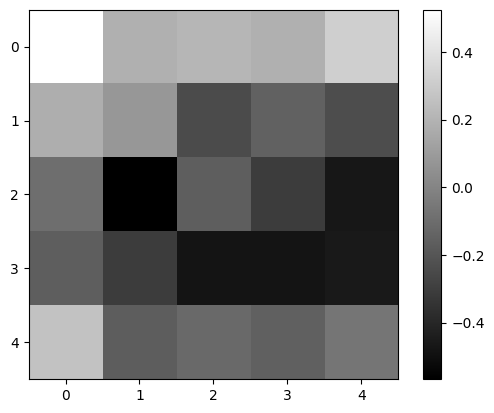

In [222]:
plt.imshow(np.array(model.conv1.weight[0][0].detach().cpu()), cmap='gray')
plt.colorbar()  # Optional: display a color bar
plt.show()

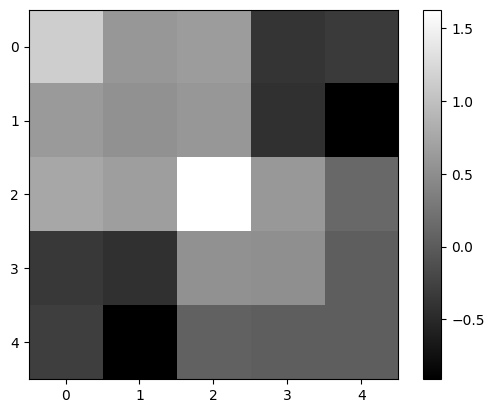

In [223]:
plt.imshow(np.array(tempFilter), cmap='gray')
plt.colorbar()  # Optional: display a color bar
plt.show()

In [174]:


# Switch model to evaluation mode
model.eval()

correct = 0
total = 0

# Disable gradient computation
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 97 %


Timing Code

In [5]:
a = torch.randint(0,10,(1,1,256,256))

In [6]:
#device = "cuda:0"
device = "cpu"

In [7]:
import time

# Record the start time


cBox = cnnBox(100,True,device)
start_time = time.perf_counter()


for i in range(1):
    a = a.to(device)
    x=cBox(a)

#print(x)

end_time = time.perf_counter()

# Calculate the time passed
time_passed = end_time - start_time

print(f'Time passed: {time_passed/1} seconds')

torch.Size([254, 1, 1]) torch.Size([1, 254, 1])
torch.Size([1, 1, 100]) torch.Size([1, 1, 100]) torch.Size([1, 1, 100]) torch.Size([1, 1, 100])
torch.Size([1, 254, 100]) torch.Size([254, 1, 100]) torch.Size([1, 254, 100]) torch.Size([254, 1, 100]) torch.Size([1, 254, 100]) torch.Size([254, 1, 100]) torch.Size([1, 254, 100]) torch.Size([254, 1, 100])
torch.Size([1, 1, 254, 254, 100]) torch.Size([1, 1, 254, 254, 100]) torch.Size([1, 1, 254, 254, 100]) torch.Size([1, 1, 254, 254, 100])
Time passed: 0.08255045022815466 seconds


In [8]:
# import time

# # Record the start time
# cBox = cnnBox(1,False,device)
# start_time = time.time()

# a = a.to(device)
# for i in range(1):
#     x=cBox(a)

# #print(x)
# end_time = time.time()

# # Calculate the time passed
# time_passed = end_time - start_time

# print(f'Time passed: {time_passed/1} seconds')

In [9]:
import time

conv2 = nn.Conv2d(1, 1, 5, bias=False).to(device)

a = torch.rand((1,1,256,256)).to(device)
a =a.to(device)

start_time = time.perf_counter()

for i in range(1):
 conv2(a)

end_time = time.perf_counter()

print(f'Time passed: {(end_time - start_time)/1} seconds')

Time passed: 0.006571175064891577 seconds


In [109]:
convLayer = cnnBox(10)


In [110]:
convLayer.boxes[0].a

Parameter containing:
tensor(2., requires_grad=True)

In [120]:
for i,j in convLayer.named_parameters():
    print(i,j)

boxes.0.alpha Parameter containing:
tensor(1., requires_grad=True)
boxes.0.a Parameter containing:
tensor(2., requires_grad=True)
boxes.0.b Parameter containing:
tensor(3., requires_grad=True)
boxes.0.c Parameter containing:
tensor(2., requires_grad=True)
boxes.0.d Parameter containing:
tensor(6., requires_grad=True)
boxes.1.alpha Parameter containing:
tensor(1., requires_grad=True)
boxes.1.a Parameter containing:
tensor(2., requires_grad=True)
boxes.1.b Parameter containing:
tensor(3., requires_grad=True)
boxes.1.c Parameter containing:
tensor(2., requires_grad=True)
boxes.1.d Parameter containing:
tensor(6., requires_grad=True)
boxes.2.alpha Parameter containing:
tensor(1., requires_grad=True)
boxes.2.a Parameter containing:
tensor(2., requires_grad=True)
boxes.2.b Parameter containing:
tensor(3., requires_grad=True)
boxes.2.c Parameter containing:
tensor(2., requires_grad=True)
boxes.2.d Parameter containing:
tensor(6., requires_grad=True)
boxes.3.alpha Parameter containing:
tensor(

In [116]:
a = convLayer((torch.ones((1,1,32,32))))

print(a)

label = torch.ones((1,128))

lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(convLayer.parameters(),lr = 0.01)

optimizer.zero_grad

loss = lossFunction(a,label)

loss.backward()

optimizer.step()




tensor([[-6.7407e-03,  3.8544e-05, -1.7569e-02,  6.6483e-04, -4.5048e-03,
         -1.0810e-02,  1.0309e-02, -5.1756e-04, -9.6741e-03,  4.6584e-03,
         -1.7217e-02, -1.7985e-02,  1.5219e-02,  1.3098e-02, -3.5450e-03,
         -1.2223e-02,  2.3422e-03,  8.6034e-03, -1.1268e-02,  3.6759e-03,
         -1.5728e-02, -1.5234e-02,  1.8618e-02,  4.2981e-03, -4.7841e-03,
          6.0257e-03, -3.8544e-03, -1.1747e-02, -5.9944e-04,  1.5845e-03,
         -5.8710e-03, -1.5349e-02, -9.0407e-04,  1.7184e-02,  6.3869e-03,
         -1.5729e-02,  1.4257e-02, -1.3998e-03,  1.2017e-02,  8.4893e-03,
          1.6917e-02,  8.4618e-03, -1.0028e-02,  1.5290e-03, -4.7018e-03,
         -1.0959e-02, -1.4157e-02,  3.5690e-03, -2.0050e-03,  9.7287e-03,
          4.1273e-03,  5.8265e-05, -8.9195e-04,  1.5278e-02, -1.6389e-02,
         -5.2448e-03, -1.0019e-02, -1.2031e-02, -9.1731e-03,  1.8046e-02,
          1.5077e-02,  9.4165e-03,  4.3142e-03, -1.0608e-02,  1.3899e-02,
         -1.4344e-02, -1.6315e-02, -5.

In [118]:
convLayer.boxes[0].a

Parameter containing:
tensor(2., requires_grad=True)